In [138]:
# Imports 
from pandas import read_csv
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy as np
import math

In [139]:
# Load data 
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [140]:
 dataset = read_csv('../data/temp/pollution.csv', parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)

In [141]:
dataset.head(100)

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,6,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,7,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,8,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,9,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [142]:
dataset.drop('No', axis=1, inplace=True)

In [143]:
dataset.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [144]:
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

In [145]:
dataset.index.name = 'date'

In [146]:
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)

In [147]:
# Drop the first 24 hours
dataset = dataset[24:]

In [148]:
print(dataset.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [149]:
# Save the dataset to a file 
dataset.to_csv('pollution_clean.csv')

In [150]:
# load dataset 
dataset = read_csv("pollution_clean.csv", header=0, index_col=0)

In [151]:
values = dataset.values

In [152]:
# Specify columns to plot 
groups = [0, 1, 2, 3, 5, 6, 7]

In [153]:
i = 1

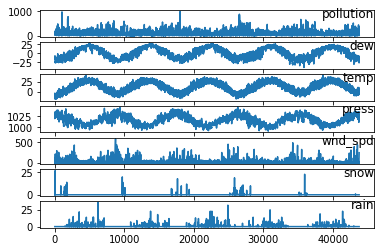

In [154]:
# Plot each column 
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [155]:
# Convert series to supervised learning 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ..., t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names 
    # Drop rows with NaN values 
    if dropnan: 
        agg.dropna(inplace=True)
    return agg

In [156]:
# Load dataset 
dataset = read_csv('pollution_clean.csv', header=0, index_col=0)

In [157]:
values = dataset.values

In [158]:
# integer encode direction 
encoder = LabelEncoder()

In [159]:
values[:, 4] = encoder.fit_transform(values[:,4])

In [160]:
# Ensure that all data is float
values = values.astype('float32')

In [161]:
# Normalize features 
scaler = MinMaxScaler(feature_range=(0,1))

In [162]:
scaled = scaler.fit_transform(values)

In [163]:
# Frame as supervised learning 
reframed = series_to_supervised(scaled, 1, 1)

In [164]:
# Drop the columns we dont want to predict 
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)

In [165]:
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  var7(t-1)  var8(t-1)   var1(t)
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   0.000000        0.0  0.148893
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   0.000000        0.0  0.159960
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   0.000000        0.0  0.182093
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   0.037037        0.0  0.138833
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   0.074074        0.0  0.109658


In [166]:
# Split into train and test sets 
values = reframed.values
n_train_hours = 365*24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

In [167]:
train.shape

(8760, 9)

In [168]:
test.shape

(35039, 9)

In [169]:
# split into inputs and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D (samples, timesteps, features )
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [170]:
# design network 
model = Sequential()

In [171]:
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))

In [172]:
model.add(Dense(1))

In [173]:
model.compile(loss='mae', optimizer='adam')

In [174]:
# Fit network 
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0560 - val_loss: 0.0515
Epoch 2/50
 - 0s - loss: 0.0367 - val_loss: 0.0467
Epoch 3/50
 - 0s - loss: 0.0209 - val_loss: 0.0404
Epoch 4/50
 - 0s - loss: 0.0162 - val_loss: 0.0252
Epoch 5/50
 - 0s - loss: 0.0149 - val_loss: 0.0167
Epoch 6/50
 - 0s - loss: 0.0149 - val_loss: 0.0158
Epoch 7/50
 - 0s - loss: 0.0148 - val_loss: 0.0154
Epoch 8/50
 - 0s - loss: 0.0148 - val_loss: 0.0149
Epoch 9/50
 - 0s - loss: 0.0148 - val_loss: 0.0145
Epoch 10/50
 - 0s - loss: 0.0146 - val_loss: 0.0141
Epoch 11/50
 - 0s - loss: 0.0146 - val_loss: 0.0142
Epoch 12/50
 - 0s - loss: 0.0147 - val_loss: 0.0138
Epoch 13/50
 - 0s - loss: 0.0145 - val_loss: 0.0137
Epoch 14/50
 - 0s - loss: 0.0145 - val_loss: 0.0136
Epoch 15/50
 - 0s - loss: 0.0145 - val_loss: 0.0136
Epoch 16/50
 - 0s - loss: 0.0146 - val_loss: 0.0135
Epoch 17/50
 - 0s - loss: 0.0145 - val_loss: 0.0135
Epoch 18/50
 - 0s - loss: 0.0145 - val_loss: 0.0135
Epoch 19/50
 - 0s - loss

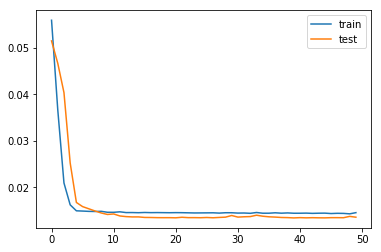

In [175]:
# plot history 
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [176]:
yhat = model.predict(test_X)

In [177]:
yhat.shape

(35039, 1)

In [178]:
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [179]:
test_X.shape

(35039, 8)

In [180]:
# Invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)

In [181]:
inv_yhat.shape

(35039, 8)

In [128]:
inv_yhat = scaler.inverse_transform(inv_yhat)

In [182]:
inv_yhat.shape

(35039, 8)

In [188]:
inv_yhat = inv_yhat[:,0:1]

In [189]:
inv_yhat.shape

(35039, 1)

In [190]:
type(inv_yhat)

numpy.ndarray

In [191]:
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))

In [192]:
inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)

In [193]:
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

In [194]:
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 131.098


In [134]:
inv_y.shape

(35039,)

In [137]:
inv_yhat.shape

(35039, 8)